In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [68]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [69]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 1 if x =='male' else 0)

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [72]:
print(train_df.Embarked.unique())

['S' 'C' 'Q' nan]


In [73]:
train_df['Embarked'].fillna(inplace=True, value='N')

In [74]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q': 2, 'N':3})

In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [76]:
train_df.Embarked.unique()

array([0, 1, 2, 3], dtype=int64)

In [77]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
train_df.Fare.fillna(inplace=True, value=round(train_df.Fare.mean()))

In [79]:
train_df.Age.fillna(inplace=True, value=round(train_df.Age.mean()))

In [80]:
x_train = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]

In [81]:
y_train = train_df['Survived']

In [82]:
lm = LinearRegression()

# Testing for accuracy 

In [83]:
x_tr_1, x_te_1, y_tr_1, y_te_1 = train_test_split(x_train, y_train, train_size=0.8)

In [84]:
lm.fit(x_tr_1, y_tr_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
import matplotlib.pyplot as plt

In [92]:
y_testing_predict = lm.predict(x_te_1)
x_testing_acc = [i/100 for i in range(50,80)]
y_testing_acc = []
for j in range(50, 80):
    k = j/100
    y_testing_predict_int = [1 if i >k else 0 for i in y_testing_predict]
    y_testing_acc.append(accuracy_score(y_te_1, y_testing_predict_int, normalize=True))

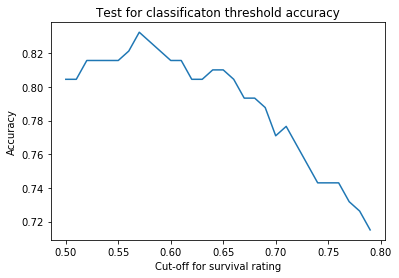

In [93]:
plt.plot(x_testing_acc, y_testing_acc)
plt.xlabel('Cut-off for survival rating')
plt.ylabel('Accuracy')
plt.title('Test for classificaton threshold accuracy')
plt.show()

In [94]:
acc_idx = y_testing_acc.index(max(y_testing_acc))
print(x_testing_acc[acc_idx])

0.57


## Therefore, a classification threshold of 0.58 should be used for the training of the entire model, as this gives the highest accuracy from the 'train_test_split' testing
note: Due to the randon assignment from the train-test-split function, the classification threshold that yields the highest accuracy wil change, further testing suggests that the threshold lies between 0.56 and 0.64 for the majority of cases.


# Training model 

In [95]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
test_df.Age.fillna(inplace=True, value=round(train_df.Age.mean()))

In [97]:
test_df['Embarked'].fillna(inplace=True, value='N')

In [98]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q': 2, 'N':3})

In [99]:
test_df['Sex'] = test_df.Sex.apply(lambda x: 1 if x =='male' else 0)

In [100]:
test_df.Fare.fillna(inplace=True, value=round(test_df.Fare.mean()))

In [101]:
x_test =test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]

In [102]:
y_predict = lm.predict(x_test)

In [103]:
len(x_test)

418

In [104]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [105]:
test_df['Survived'] = pd.Series(y_predict)

In [106]:
test_df['Survived'] = test_df.Survived.apply(lambda x: 1 if x >0.58 else 0)

In [107]:
test_df.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,0,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,2,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,1,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,0,0


In [108]:
final_df = test_df.filter(['PassengerId', 'Survived'])

In [109]:
final_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [110]:
final_df.to_csv('mlr_survival_predictions.csv')